# Code to verify and visualize reorientation caused twinning in the deformation gradient.
## Using the correspondence matrix method.
By Satyapriya Gupta, Achal H P

Reference Niewczas, Acta Materialia, 2010

In [1]:
import math
import numpy as np
import scipy.linalg
from numpy.linalg import inv
import damask

### Test Case: Extension Twinning $( \bar{1} 0 1 2) [1 0 \bar{1} 1] $

Conversion to Miller indices: $ (\bar{1} 0 2) [2 1 1] $

In [2]:
# Twin direction:
m = np.array([2, 1, 1])
# Habit plane normal
n = np.array([-1, 0, 2])
# Mapping from Miller indes to cartesian coordinate system
matA=np.array([[1, -0.5, 0],[0, 0.5*np.sqrt(3), 0],[0, 0, 1.624]])
#norm of twin direction
norm_mcart=np.linalg.norm(np.matmul(matA,m))
# norm of twin plane
norm_ncart=np.linalg.norm(np.matmul(n,inv(matA)))
# normalized unit vectors:
unit_mcart = np.matmul(matA,m)/norm_mcart
unit_ncart = np.matmul(n, inv(matA))/norm_ncart
# Characteristic shear for Extension twin of Mg
s = 0.128917
print(norm_mcart)
print(norm_ncart)
print(unit_mcart)
print(unit_ncart)

2.3743159014756228
1.6881920256873888
[0.63176092 0.36474734 0.68398649]
[-0.59234968 -0.34199325  0.72949468]


### Please provide Euler Angles Here:

In [3]:
phi_1 = 17
phi_ = 92
phi_2 = 170

init = (damask.Orientation.from_Euler_angles(
         phi=[phi_1,phi_,phi_2],
         degrees=True,
         family='hexagonal',
         lattice='hP',
         a=1.0,b=1.0,c=1.6235).as_matrix())
print(init)


[[-0.9400045  -0.29372535  0.1735424 ]
 [-0.17610919 -0.01790229 -0.98420783]
 [ 0.2921936  -0.9557222  -0.0348995 ]]


### Initial Undeformed Condition, $ F = Identity matrix $

In [4]:
F = np.identity(3)

### If $F = I$, then inverse of $F$ gives $F_e$.

In [5]:
Fp=init
Fe=inv(Fp)
Rinv = inv(init)

### Shape change by twinning in the reference configuration:

In [6]:
S_ref= (s * np.einsum('i,j',np.matmul(Rinv,unit_mcart),np.matmul(Rinv,unit_ncart)) 
        + np.identity(3))
print("deformation gradient of shape change= \n", S_ref)

deformation gradient of shape change= 
 [[ 0.95095672  0.03054648 -0.01230733]
 [-0.09052208  1.05638144 -0.02271637]
 [-0.02924172  0.01821313  0.99266184]]


### After twinning, $ F_1 =  Fe_1 * {F_p}_1 $ , where $ {F_p}_1 = C * {F_p}$

In [7]:
F1=S_ref
C=np.array([[-0.25,0.433013,-0.923645],[0.433013,-0.75,-0.533267],[-0.812, -0.468808, 0]])
Fe1=np.matmul(F1,inv(np.matmul(C,Fp)))
print ("with determinant of ",np.linalg.det(Fe1))

with determinant of  1.000000166095149


### Right polar decomposition of $F_e$, $ F_e = R U $ gives the rotation of deformed voxel.

In [8]:
(R_,U_) = scipy.linalg.polar(Fe1,'right')
check = (damask.Orientation.from_matrix(R=R_,
                                        family='hexagonal',lattice='hP',
                                        a=1.0,b=1.0,c=1.6235)
         .as_Euler_angles(degrees=True))
print(check)

[206.53799212  70.1926324   77.64540521]


### Get the orientation details

In [9]:
new_ori = (damask.Orientation.from_matrix(R=np.linalg.inv(R_),
                                          family='hexagonal',
                                          lattice='hP',a=1.0,b=1.0,c=1.6235))
(print(damask.Orientation.from_matrix(R=np.linalg.inv(R_),
                                      family='hexagonal',lattice='hP',
                                      a=1.0,b=1.0,c=1.6235).as_Euler_angles(degrees=True)))

[102.35459479  70.1926324  333.46200788]


In [10]:
old_ori = (damask.Orientation.from_Euler_angles(phi=[phi_1,phi_,phi_2],
                                                degrees=True,family='hexagonal',
                                                lattice='hP',a=1.0,b=1.0,c=1.6235))
print(old_ori)

Crystal family: hexagonal
Bravais lattice: hP
a=1 m, b=1 m, c=1.6235 m
α=90°, β=90°, γ=120°
Quaternion [ 0.04240788 -0.16792654  0.69946438 -0.69336269]


In [11]:
dis = old_ori.disorientation(new_ori)
print(dis)
print(dis.as_Euler_angles(degrees=True))

Crystal family: hexagonal
Bravais lattice: hP
a=1 m, b=1 m, c=1.6235 m
α=90°, β=90°, γ=120°
Quaternion [7.29494643e-01 6.83986524e-01 3.14974755e-08 1.07984812e-07]
[ 0.         86.31191012  0.        ]


## Result: Print the disorientation between undeformed and deformed voxel.

In [12]:
print('disorientation =',dis.as_axis_angle(degrees=True,pair=True)[1],'degrees')

disorientation = 86.31191011698508 degrees


# Code to visualization of lattice reorientation caused by twinning.

First cell below gives HCP unit cell with euler angles 0,0,0.

Second cell below rotates unit cell by provided euler angles.

Third cell below shows reorientation done after twinning.

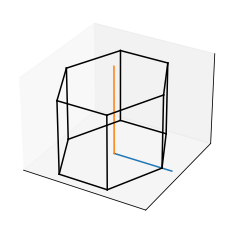

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import cos, sin, radians

# Define the line
x = np.linspace(0, 1.2, 100)
y = np.zeros_like(x)
z = np.zeros_like(x)

x1 = np.zeros_like(x)
y1 = np.zeros_like(x)
z1 = np.linspace(0, 1.2, 100)

x2 = np.zeros_like(x)
y2 = np.linspace(0, 1.2, 100)
z2 = np.zeros_like(x)

h11 = np.linspace(1,0.5,100)
h12 = h11*np.sqrt(3) - np.sqrt(3)
h13 = np.zeros_like(h11)

h21 = np.linspace(-0.5, 0.5, 100)
h22 = np.ones_like(h21) * np.sqrt(3) / 2
h23 = np.zeros_like(h21)

h31 = np.linspace(-0.5, 0.5, 100)
h32 = - np.ones_like(h31) * np.sqrt(3) / 2
h33 = np.zeros_like(h31)

h41 = np.linspace(1,0.5,100)
h42 = - h41*np.sqrt(3) + np.sqrt(3)
h43 = np.zeros_like(h41)

h51 = np.linspace(-1,-0.5,100)
h52 = - h51*np.sqrt(3) - np.sqrt(3)
h53 = np.zeros_like(h51)

h61 = np.linspace(-1,-0.5,100)
h62 = h61*np.sqrt(3) + np.sqrt(3)
h63 = np.zeros_like(h61)

k11 = np.linspace(1,0.5,100)
k12 = k11*np.sqrt(3) - np.sqrt(3)
k13 = np.ones_like(k11)

k21 = np.linspace(-0.5, 0.5, 100)
k22 = np.ones_like(k21) * np.sqrt(3) / 2
k23 = np.ones_like(k21)

k31 = np.linspace(-0.5, 0.5, 100)
k32 = - np.ones_like(k31) * np.sqrt(3) / 2
k33 = np.ones_like(k31)

k41 = np.linspace(1,0.5,100)
k42 = - k41*np.sqrt(3) + np.sqrt(3)
k43 = np.ones_like(k41)

k51 = np.linspace(-1,-0.5,100)
k52 = - k51*np.sqrt(3) - np.sqrt(3)
k53 = np.ones_like(k51)

k61 = np.linspace(-1,-0.5,100)
k62 = k61*np.sqrt(3) + np.sqrt(3)
k63 = np.ones_like(k61)



v11 = np.ones_like(x) * 0.5
v12 = np.ones_like(x) * np.sqrt(3) / 2
v13 = np.linspace(0, 1, 100)

v21 = - np.ones_like(x) * 0.5
v22 = np.ones_like(x) * np.sqrt(3) / 2
v23 = np.linspace(0, 1, 100)

v31 = - np.ones_like(x) * 0.5
v32 = - np.ones_like(x) * np.sqrt(3) / 2
v33 = np.linspace(0, 1, 100)

v41 = np.ones_like(x) * 0.5
v42 = - np.ones_like(x) * np.sqrt(3) / 2
v43 = np.linspace(0, 1, 100)

v51 = - np.ones_like(x)
v52 = np.zeros_like(x)
v53 = np.linspace(0, 1, 100)

v61 = np.ones_like(x)
v62 = np.zeros_like(x)
v63 = np.linspace(0, 1, 100)

# Plot the line
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.plot(x1, y1, z1)
#ax.plot(x2, y2, z2)
ax.plot(h11, h12, h13, 'k-')
ax.plot(h21, h22, h23, 'k-')
ax.plot(h31, h32, h33, 'k-')
ax.plot(h41, h42, h43, 'k-')
ax.plot(h51, h52, h53, 'k-')
ax.plot(h61, h62, h63, 'k-')
ax.plot(k11, k12, k13, 'k-')
ax.plot(k21, k22, k23, 'k-')
ax.plot(k31, k32, k33, 'k-')
ax.plot(k41, k42, k43, 'k-')
ax.plot(k51, k52, k53, 'k-')
ax.plot(k61, k62, k63, 'k-')
ax.plot(v11, v12, v13, 'k-')
ax.plot(v21, v22, v23, 'k-')
ax.plot(v31, v32, v33, 'k-')
ax.plot(v41, v42, v43, 'k-')
ax.plot(v51, v52, v53, 'k-')
ax.plot(v61, v62, v63, 'k-')

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')
plt.show()

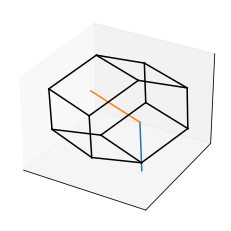

In [14]:
# Define the rotation angles (in radians)
alpha = radians(phi_1)  # Rotation around the x-axis
beta = radians(phi_)   # Rotation around the y-axis
gamma = radians(phi_2)  # Rotation around the z-axis

# Create the rotation matrices
Rx = np.array([[1, 0, 0],
               [0, cos(alpha), -sin(alpha)],
               [0, sin(alpha), cos(alpha)]])

Ry = np.array([[cos(beta), 0, sin(beta)],
               [0, 1, 0],
               [-sin(beta), 0, cos(beta)]])

Rz = np.array([[cos(gamma), -sin(gamma), 0],
               [sin(gamma), cos(gamma), 0],
               [0, 0, 1]])

# Combine the rotation matrices
R = Rz @ Ry @ Rx

# Apply the rotation to the line
point1 = np.column_stack((x, y, z))
point2 = np.column_stack((x1, y1, z1))
point3 = np.column_stack((h11,h12,h13))
point4 = np.column_stack((h21, h22, h23))
point5 = np.column_stack((h31, h32, h33))
point6 = np.column_stack((h41, h42, h43))
point7 = np.column_stack((h51, h52, h53))
point8 = np.column_stack((h61, h62, h63))
point9 = np.column_stack((k11, k12, k13))
point10 = np.column_stack((k21, k22, k23))
point11 = np.column_stack((k31, k32, k33))
point12 = np.column_stack((k41, k42, k43))
point13 = np.column_stack((k51, k52, k53))
point14 = np.column_stack((k61, k62, k63))
point15 = np.column_stack((v11, v12, v13))
point16 = np.column_stack((v21, v22, v23))
point17 = np.column_stack((v31, v32, v33))
point18 = np.column_stack((v41, v42, v43))
point19 = np.column_stack((v51, v52, v53))
point20 = np.column_stack((v61, v62, v63))
point21 = np.column_stack((x2, y2, z2))

rotated_point1 = np.dot(R, point1.T).T
rotated_point2 = np.dot(R, point2.T).T
rotated_point3 = np.dot(R, point3.T).T
rotated_point4 = np.dot(R, point4.T).T
rotated_point5 = np.dot(R, point5.T).T
rotated_point6 = np.dot(R, point6.T).T
rotated_point7 = np.dot(R, point7.T).T
rotated_point8 = np.dot(R, point8.T).T
rotated_point9 = np.dot(R, point9.T).T
rotated_point10 = np.dot(R, point10.T).T
rotated_point11 = np.dot(R, point11.T).T
rotated_point12 = np.dot(R, point12.T).T
rotated_point13 = np.dot(R, point13.T).T
rotated_point14 = np.dot(R, point14.T).T
rotated_point15 = np.dot(R, point15.T).T
rotated_point16 = np.dot(R, point16.T).T
rotated_point17 = np.dot(R, point17.T).T
rotated_point18 = np.dot(R, point18.T).T
rotated_point19 = np.dot(R, point19.T).T
rotated_point20 = np.dot(R, point20.T).T
rotated_point21 = np.dot(R, point21.T).T

# Extract the rotated coordinates
x_rotated1, y_rotated1, z_rotated1 = rotated_point1.T
x_rotated2, y_rotated2, z_rotated2 = rotated_point2.T
x_rotated3, y_rotated3, z_rotated3 = rotated_point3.T
x_rotated4, y_rotated4, z_rotated4 = rotated_point4.T
x_rotated5, y_rotated5, z_rotated5 = rotated_point5.T
x_rotated6, y_rotated6, z_rotated6 = rotated_point6.T
x_rotated7, y_rotated7, z_rotated7 = rotated_point7.T
x_rotated8, y_rotated8, z_rotated8 = rotated_point8.T
x_rotated9, y_rotated9, z_rotated9 = rotated_point9.T
x_rotated10, y_rotated10, z_rotated10 = rotated_point10.T
x_rotated11, y_rotated11, z_rotated11 = rotated_point11.T
x_rotated12, y_rotated12, z_rotated12 = rotated_point12.T
x_rotated13, y_rotated13, z_rotated13 = rotated_point13.T
x_rotated14, y_rotated14, z_rotated14 = rotated_point14.T
x_rotated15, y_rotated15, z_rotated15 = rotated_point15.T
x_rotated16, y_rotated16, z_rotated16 = rotated_point16.T
x_rotated17, y_rotated17, z_rotated17 = rotated_point17.T
x_rotated18, y_rotated18, z_rotated18 = rotated_point18.T
x_rotated19, y_rotated19, z_rotated19 = rotated_point19.T
x_rotated20, y_rotated20, z_rotated20 = rotated_point20.T
x_rotated21, y_rotated21, z_rotated21 = rotated_point21.T


# Plot the line
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(x_rotated1, y_rotated1, z_rotated1)
ax.plot(x_rotated2, y_rotated2, z_rotated2)
#ax.plot(x_rotated21, y_rotated21, z_rotated21)
ax.plot(x_rotated3, y_rotated3, z_rotated3, 'k-')
ax.plot(x_rotated4, y_rotated4, z_rotated4, 'k-')
ax.plot(x_rotated5, y_rotated5, z_rotated5, 'k-')
ax.plot(x_rotated6, y_rotated6, z_rotated6, 'k-')
ax.plot(x_rotated7, y_rotated7, z_rotated7, 'k-')
ax.plot(x_rotated8, y_rotated8, z_rotated8, 'k-')
ax.plot(x_rotated9, y_rotated9, z_rotated9, 'k-')
ax.plot(x_rotated10, y_rotated10, z_rotated10, 'k-')
ax.plot(x_rotated11, y_rotated11, z_rotated11, 'k-')
ax.plot(x_rotated12, y_rotated12, z_rotated12, 'k-')
ax.plot(x_rotated13, y_rotated13, z_rotated13, 'k-')
ax.plot(x_rotated14, y_rotated14, z_rotated14, 'k-')
ax.plot(x_rotated15, y_rotated15, z_rotated15, 'k-')
ax.plot(x_rotated16, y_rotated16, z_rotated16, 'k-')
ax.plot(x_rotated17, y_rotated17, z_rotated17, 'k-')
ax.plot(x_rotated18, y_rotated18, z_rotated18, 'k-')
ax.plot(x_rotated19, y_rotated19, z_rotated19, 'k-')
ax.plot(x_rotated20, y_rotated20, z_rotated20, 'k-')

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')
plt.show()

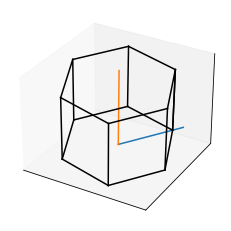

In [15]:
# Define the rotation angles (in radians)
alpha = damask.Orientation.from_matrix(R=np.linalg.inv(R_),family='hexagonal',lattice='hP',a=1.0,b=1.0,c=1.6235).as_Euler_angles(degrees=False)[0] 
beta = damask.Orientation.from_matrix(R=np.linalg.inv(R_),family='hexagonal',lattice='hP',a=1.0,b=1.0,c=1.6235).as_Euler_angles(degrees=False)[1] 
gamma = damask.Orientation.from_matrix(R=np.linalg.inv(R_),family='hexagonal',lattice='hP',a=1.0,b=1.0,c=1.6235).as_Euler_angles(degrees=False)[2] 

# Create the rotation matrices
Rx = np.array([[1, 0, 0],
               [0, cos(alpha), -sin(alpha)],
               [0, sin(alpha), cos(alpha)]])

Ry = np.array([[cos(beta), 0, sin(beta)],
               [0, 1, 0],
               [-sin(beta), 0, cos(beta)]])

Rz = np.array([[cos(gamma), -sin(gamma), 0],
               [sin(gamma), cos(gamma), 0],
               [0, 0, 1]])

# Combine the rotation matrices
R = Rz @ Ry @ Rx

# Apply the rotation to the line
point21 = np.column_stack((x_rotated1, y_rotated1, z_rotated1))
point22 = np.column_stack((x_rotated2, y_rotated2, z_rotated2))
point23 = np.column_stack((x_rotated3, y_rotated3, z_rotated3))
point24 = np.column_stack((x_rotated4, y_rotated4, z_rotated4))
point25 = np.column_stack((x_rotated5, y_rotated5, z_rotated5))
point26 = np.column_stack((x_rotated6, y_rotated6, z_rotated6))
point27 = np.column_stack((x_rotated7, y_rotated7, z_rotated7))
point28 = np.column_stack((x_rotated8, y_rotated8, z_rotated8))
point29 = np.column_stack((x_rotated9, y_rotated9, z_rotated9))
point30 = np.column_stack((x_rotated10, y_rotated10, z_rotated10))
point31 = np.column_stack((x_rotated11, y_rotated11, z_rotated11))
point32 = np.column_stack((x_rotated12, y_rotated12, z_rotated12))
point33 = np.column_stack((x_rotated13, y_rotated13, z_rotated13))
point34 = np.column_stack((x_rotated14, y_rotated14, z_rotated14))
point35 = np.column_stack((x_rotated15, y_rotated15, z_rotated15))
point36 = np.column_stack((x_rotated16, y_rotated16, z_rotated16))
point37 = np.column_stack((x_rotated17, y_rotated17, z_rotated17))
point38 = np.column_stack((x_rotated18, y_rotated18, z_rotated18))
point39 = np.column_stack((x_rotated19, y_rotated19, z_rotated19))
point40 = np.column_stack((x_rotated20, y_rotated20, z_rotated20))
point41 = np.column_stack((x_rotated21, y_rotated21, z_rotated21))

rotated_point21 = np.dot(R, point21.T).T
rotated_point22 = np.dot(R, point22.T).T
rotated_point23 = np.dot(R, point23.T).T
rotated_point24 = np.dot(R, point24.T).T
rotated_point25 = np.dot(R, point25.T).T
rotated_point26 = np.dot(R, point26.T).T
rotated_point27 = np.dot(R, point27.T).T
rotated_point28 = np.dot(R, point28.T).T
rotated_point29 = np.dot(R, point29.T).T
rotated_point30 = np.dot(R, point30.T).T
rotated_point31 = np.dot(R, point31.T).T
rotated_point32 = np.dot(R, point32.T).T
rotated_point33 = np.dot(R, point33.T).T
rotated_point34 = np.dot(R, point34.T).T
rotated_point35 = np.dot(R, point35.T).T
rotated_point36 = np.dot(R, point36.T).T
rotated_point37 = np.dot(R, point37.T).T
rotated_point38 = np.dot(R, point38.T).T
rotated_point39 = np.dot(R, point39.T).T
rotated_point40 = np.dot(R, point40.T).T
rotated_point41 = np.dot(R, point41.T).T

# Extract the rotated coordinates
x_rotated21, y_rotated21, z_rotated21 = rotated_point21.T
x_rotated22, y_rotated22, z_rotated22 = rotated_point22.T
x_rotated23, y_rotated23, z_rotated23 = rotated_point23.T
x_rotated24, y_rotated24, z_rotated24 = rotated_point24.T
x_rotated25, y_rotated25, z_rotated25 = rotated_point25.T
x_rotated26, y_rotated26, z_rotated26 = rotated_point26.T
x_rotated27, y_rotated27, z_rotated27 = rotated_point27.T
x_rotated28, y_rotated28, z_rotated28 = rotated_point28.T
x_rotated29, y_rotated29, z_rotated29 = rotated_point29.T
x_rotated30, y_rotated30, z_rotated30 = rotated_point30.T
x_rotated31, y_rotated31, z_rotated31 = rotated_point31.T
x_rotated32, y_rotated32, z_rotated32 = rotated_point32.T
x_rotated33, y_rotated33, z_rotated33 = rotated_point33.T
x_rotated34, y_rotated34, z_rotated34 = rotated_point34.T
x_rotated35, y_rotated35, z_rotated35 = rotated_point35.T
x_rotated36, y_rotated36, z_rotated36 = rotated_point36.T
x_rotated37, y_rotated37, z_rotated37 = rotated_point37.T
x_rotated38, y_rotated38, z_rotated38 = rotated_point38.T
x_rotated39, y_rotated39, z_rotated39 = rotated_point39.T
x_rotated40, y_rotated40, z_rotated40 = rotated_point40.T
x_rotated41, y_rotated41, z_rotated41 = rotated_point41.T


# Plot the line
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_rotated21, y_rotated21, z_rotated21)
ax.plot(x_rotated22, y_rotated22, z_rotated22)
ax.plot(x_rotated23, y_rotated23, z_rotated23, 'k-')
ax.plot(x_rotated24, y_rotated24, z_rotated24, 'k-')
ax.plot(x_rotated25, y_rotated25, z_rotated25, 'k-')
ax.plot(x_rotated26, y_rotated26, z_rotated26, 'k-')
ax.plot(x_rotated27, y_rotated27, z_rotated27, 'k-')
ax.plot(x_rotated28, y_rotated28, z_rotated28, 'k-')
ax.plot(x_rotated29, y_rotated29, z_rotated29, 'k-')
ax.plot(x_rotated30, y_rotated30, z_rotated30, 'k-')
ax.plot(x_rotated31, y_rotated31, z_rotated31, 'k-')
ax.plot(x_rotated32, y_rotated32, z_rotated32, 'k-')
ax.plot(x_rotated33, y_rotated33, z_rotated33, 'k-')
ax.plot(x_rotated34, y_rotated34, z_rotated34, 'k-')
ax.plot(x_rotated35, y_rotated35, z_rotated35, 'k-')
ax.plot(x_rotated36, y_rotated36, z_rotated36, 'k-')
ax.plot(x_rotated37, y_rotated37, z_rotated37, 'k-')
ax.plot(x_rotated38, y_rotated38, z_rotated38, 'k-')
ax.plot(x_rotated39, y_rotated39, z_rotated39, 'k-')
ax.plot(x_rotated40, y_rotated40, z_rotated40, 'k-')
ax.plot(x_rotated40, y_rotated40, z_rotated40, 'k-')
#ax.plot(x_rotated41, y_rotated41, z_rotated41)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')
plt.show()